In [1]:
import numpy as np
import pandas as pd 



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



from numpy import arange

In [3]:
train=pd.read_csv(r"C:\Users\sonik\Downloads\house-prices-advanced-regression-techniques\train.csv")
test=pd.read_csv(r"C:\Users\sonik\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [4]:
print("information on train", train.info())
print("information on test", test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

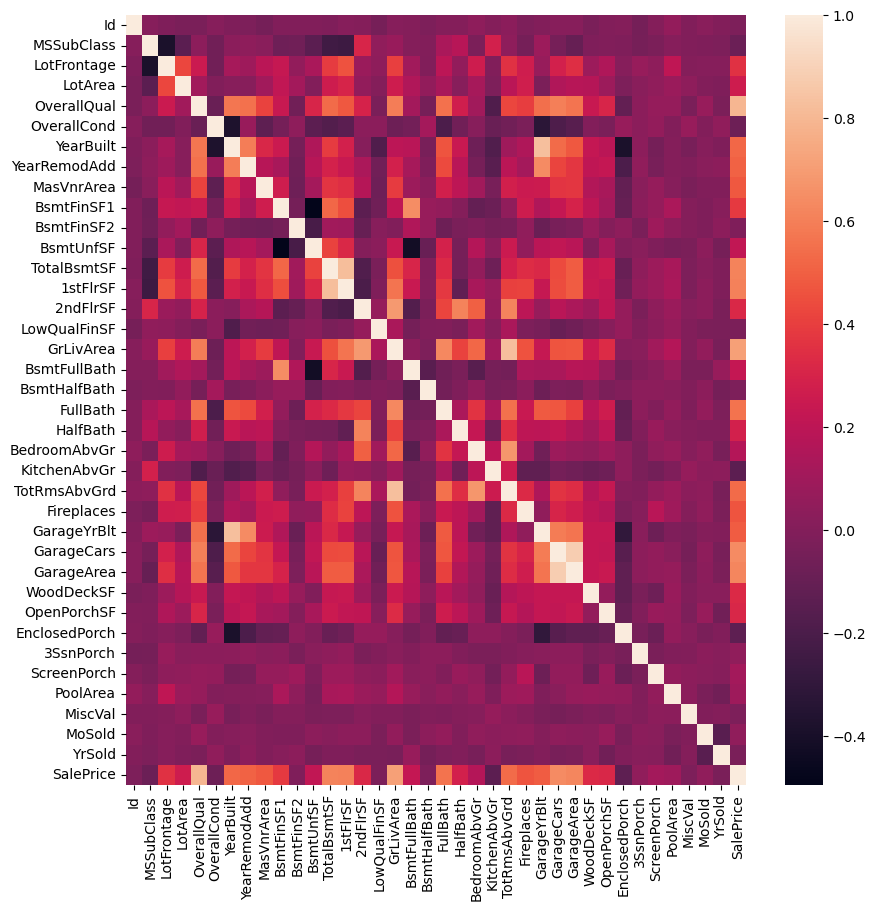

In [6]:
fig= plt.figure(figsize=(10,10))
sns.heatmap(train.corr())

In [7]:
y=train.SalePrice
data=pd.concat([train,test], ignore_index=True)
data.drop(columns=['SalePrice'], inplace=True)
data.shape

(2919, 80)

In [8]:
data=data.drop(columns=['MSSubClass','LotArea','OverallCond','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF', 'BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr',
 'KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

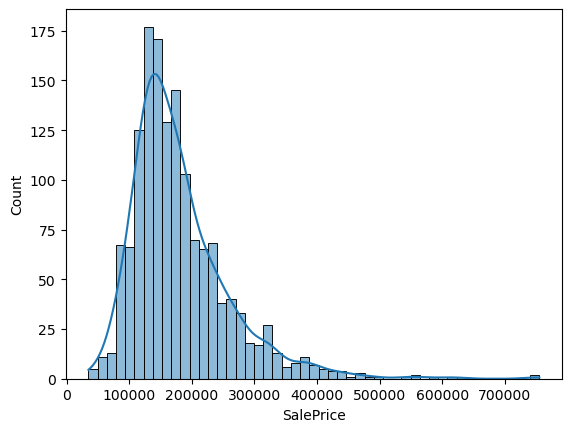

In [9]:
sns.histplot(data=train, x='SalePrice', kde=True)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

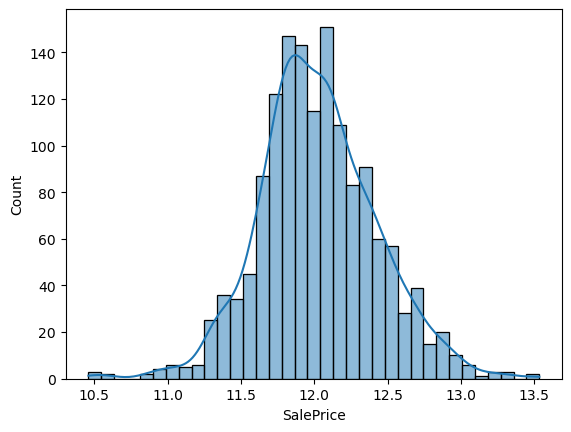

In [10]:
sns.histplot(data=train, x=np.log(train['SalePrice']), kde=True)

In [11]:
data.shape

(2919, 57)

In [12]:
miss_table=pd.DataFrame()
missing_values=data.isnull().sum()[data.isnull().sum()!=0]
percentage=100*missing_values.values/data.shape[0]
miss_table['cols']=missing_values.index
miss_table['missing_values']=missing_values.values
miss_table['percent']=percentage
miss_table.sort_values('percent', ascending=False)

,cols,missing_values,percent
25,PoolQC,2909,99.657417
27,MiscFeature,2814,96.402878
2,Alley,2721,93.216855
26,Fence,2348,80.438506
17,FireplaceQu,1420,48.646797
1,LotFrontage,486,16.649538
23,GarageQual,159,5.447071
24,GarageCond,159,5.447071
20,GarageFinish,159,5.447071
19,GarageYrBlt,159,5.447071


In [13]:
train.dropna(axis=0, subset=['SalePrice'], inplace=True)
y=train.SalePrice
train.drop(['SalePrice'], axis=1, inplace=True)

X_train_full,X_valid_full, y_train, y_valid = train_test_split(train, y, test_size=0.2, random_state=0)

num_cols=[col for col in train.columns if train[col].dtype!=object]
cat_cols=[col for col in train.columns if train[col].dtype==object and train[col].nunique()<10]
mycols=num_cols+cat_cols

In [14]:
X_train=X_train_full[mycols].copy()
X_valid=X_valid_full[mycols].copy()
X_test=test[mycols].copy()

In [20]:
num_transform=SimpleImputer(strategy='mean')
cat_transform=Pipeline(steps=[('imp', SimpleImputer(strategy='most_frequent')),
                              ('oe',OneHotEncoder(handle_unknown='ignore'))
                               ])
                              
ct=ColumnTransformer(transformers=[('num',num_transform, num_cols),
                                   ('cat',cat_transform, cat_cols)
    
])
                              
model= XGBRegressor(n_jobs=5)

mypipe= Pipeline(steps=[
    ('preprocessor', ct),
    ('xgb',model)
])




In [21]:
param_grid = {
    "xgb__n_estimators": [100,500,1000],
    "xgb__learning_rate": [0.01, 0.05, 0.1]
    
}

# params = {"mypipe__xgb__eval_set": [(X_valid, y_valid)], 
#               "mypipe__xgb__early_stopping_rounds": 10, 
#               "mypipe__xgb__verbose": False}

searchCV = GridSearchCV(mypipe, cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
searchCV.fit(X_train, y_train) 
              

best_n_estimators = searchCV.best_params_['xgb__n_estimators']
best_learning_rate = searchCV.best_params_['xgb__learning_rate']

In [22]:
print(f'Best learning rate is {best_learning_rate}. Best number of estimators is {best_n_estimators}.')
print(f'best score is {np.sqrt(-searchCV.best_score_)}')

Best learning rate is 0.1. Best number of estimators is 500.
best score is 27989.274549332848


In [23]:
mypipe= Pipeline(steps=[
    ('preprocessor', ct),
    ('xgb',XGBRegressor(n_estimators=500, learning_rate=0.1, n_jobs=5))
])

# mypipe.fit(X_train,y_train, eval_set=[(X_valid,y_valid)], verbose=False)

scores = np.sqrt(-1 * cross_val_score(mypipe, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_squared_error'))

print("MSE scores:\n", scores.mean())

MSE scores:
 27109.467972448656


In [24]:
final_X=pd.concat([X_train,X_valid], axis=0)
final_y=pd.concat([y_train,y_valid], axis=0)

scores = np.sqrt(-1 * cross_val_score(mypipe, final_X, final_y,
                              cv=5,
                              scoring='neg_mean_squared_error'))
print("MSE scores:\n", scores.mean())

MSE scores:
 27882.054752832366


In [25]:
mypipe.fit(final_X,final_y)

yhat=mypipe.predict(X_test)
predictions=pd.DataFrame({'Id': test['Id'],
                          'SalePrice': yhat
                           })


In [26]:
predictions

,Id,SalePrice
0,1461,124949.796875
1,1462,155894.671875
2,1463,177162.312500
3,1464,191233.781250
4,1465,187431.171875
...,...,...
1454,2915,81982.617188
1455,2916,82069.398438
1456,2917,159768.312500
1457,2918,104658.382812
